# Pyroxene Classification
- We consider a more real world example, using pyroxene compositions
from Wieser et al. (2021b) from the 2018 eruption of Kilauea

## Import Python things

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt
import ternary

## Set plotting parameters

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Load in pyroxene compositions
- Even though some of these are Opxs, lets just load them all as Cpxs for now....

In [3]:
## Loading Pyroxenes
Px_dict=pt.import_excel('Plotting_inputs_Amp_Cpx_Ol_Fspar.xlsx', sheet_name='Pyroxenes_F8')
Px_Comps=Px_dict['Cpxs']

## Lets calculate the components we need to plot a ternary diagram. 

In [4]:
tern_points=pt.tern_points_px(px_comps=Px_Comps)

## First, we can plot all the samples as a single color
- We can see here, we have very distinct clusters

<AxesSubplot:>

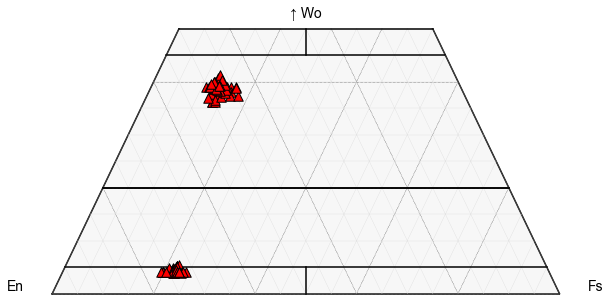

In [5]:
# First, define the plot, e.g., here, we specify we want the grid, and labels
fig, tax = pt.plot_px_classification(figsize=(10, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Now feed in your data we calculated at the start in terms of ternary axes!

tax.scatter(
    tern_points,
    edgecolor="k",
    marker="^",
    facecolor="red",
    label='Label1',
   s=90
)
    

## Or, we can try to segment for different samples, First, lets find how many unique samples we have

In [6]:
Px_Comps['Sample_ID_Cpx'].unique()

array(['LL5', 'LL3', 'LL1', 'LL9', 'LL11', 'LL12', 'LL8', 'LL10', 'LL6',
       'LL2'], dtype=object)

## Now lets segment out for each sample ID
- This might seem a bit confusing, because tern_points is a numpy array so has lost its sample ID. However, its the same length as Px_Comps, so we can say find the rows of tern_points where the equivalent row of Px_Comps has this sample ID
- Because we are indexing a numpy array, we dont need .loc, we just use brackets.
- note you could do this in a foorloop, but this example just walks through all steps, and lets you control colors etc. more easily.

In [7]:
Px_Comps_LL5=tern_points[Px_Comps['Sample_ID_Cpx']=="LL5"]
Px_Comps_LL3=tern_points[Px_Comps['Sample_ID_Cpx']=="LL3"]
Px_Comps_LL1=tern_points[Px_Comps['Sample_ID_Cpx']=="LL1"]
Px_Comps_LL9=tern_points[Px_Comps['Sample_ID_Cpx']=="LL9"]
Px_Comps_LL11=tern_points[Px_Comps['Sample_ID_Cpx']=="LL11"]
Px_Comps_LL12=tern_points[Px_Comps['Sample_ID_Cpx']=="LL12"]
Px_Comps_LL8=tern_points[Px_Comps['Sample_ID_Cpx']=="LL8"]
Px_Comps_LL10=tern_points[Px_Comps['Sample_ID_Cpx']=="LL8"]
Px_Comps_LL6=tern_points[Px_Comps['Sample_ID_Cpx']=="LL6"]
Px_Comps_LL2=tern_points[Px_Comps['Sample_ID_Cpx']=="LL2"]


## Plot 1
- Lets just plot the pyroxenes from sample LL2, which was dacitic in composition vs. basaltic-andesitic material in the other sampels

<AxesSubplot:>

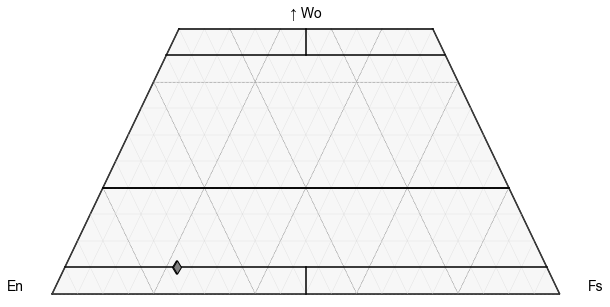

In [8]:
# First, define the plot, e.g., here, we specify we want the grid, and labels
fig, tax = pt.plot_px_classification(figsize=(10, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Now feed in your data we calculated at the start in terms of ternary axes!

tax.scatter(
   Px_Comps_LL2,
    edgecolor="k",
    marker="d",
    facecolor="grey",
    label='Label1',
   s=90
)
    

## Plot 2
- Lets add LL10, LL9, LL12, LL11, LL6, and LL3 which were all erupted at similar times (Termed Early Phase 1) as a single symbol type. To do this, first we combine these different numpy arrays (called Early Samples)
- We also want to add LL5, erupted on May 16th as a different color, along with LL1. 
- This shows that regardless of the fissure, pyroxene compositions are very similar, consistent with derivation from a single magma body

In [9]:
Early_Samples=np.concatenate((Px_Comps_LL10, Px_Comps_LL9, Px_Comps_LL12, Px_Comps_LL11, Px_Comps_LL6, Px_Comps_LL3), axis=0)

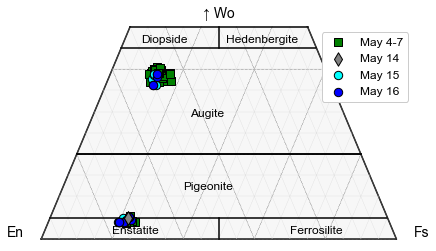

In [34]:
# First, define the plot, e.g., here, we specify we want the grid, and labels
fig, tax = pt.plot_px_classification(figsize=(7, 4),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True, labels=True)

## Adding the dacitic sample as grey diamonds


    

    
tax.scatter(
   Early_Samples,
    edgecolor="k",
    marker="s",
    facecolor="green",
    label='May 4-7',
   s=80
)


tax.scatter(
   Px_Comps_LL2,
    edgecolor="k",
    marker="d",
    facecolor="grey",
    label='May 14',
   s=90, zorder=100
)

tax.scatter(
   Px_Comps_LL1,
    edgecolor="k",
    marker="o",
    facecolor="cyan",
    label='May 15',
   s=70
)

tax.scatter(
   Px_Comps_LL5,
    edgecolor="k",
    marker="o",
    facecolor="blue",
    label='May 16',
   s=70
)




tax.legend(loc='upper right', facecolor='white', framealpha=1)

fig.savefig('Px_Classification_Kil.png', dpi=300)